# Angle Modulation Demos

In [1]:
import numpy as np
import scipy as sp
import scipy.signal

In [2]:
import micropip

await micropip.install('ipywidgets')
await micropip.install('ipympl')

from ipywidgets import widgets, interact, fixed

In [3]:
import matplotlib.pyplot as plt
%matplotlib ipympl

## Triangular Message Signal

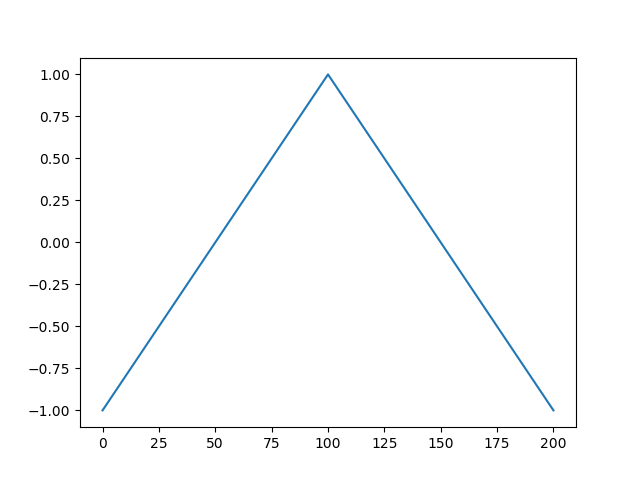

In [4]:
# Triangle wave generation (scipy only seems to have sawtooth)
def triangle_wave(t, amplitude, period):
    m = [-2*(np.abs(-(np.fmod(t[i]*(amplitude)/period, amplitude)-amplitude/2)))+amplitude/2 for i in range(len(t))]
    m = np.array(m)
    return m;

tri_amplitude = 2
tri_period = 2e-4

max_time = 1*tri_period
t_steps = 20000
t = np.linspace(0,max_time,t_steps)

m = triangle_wave(t, tri_amplitude, tri_period)

# Using gradient may smooth this rather than a first order approximation
m_dot = np.diff(m)/(max_time/t_steps)

# Convert carrier frequency to radians/sec
wc = 100e6 * 2*np.pi

kP = 10*np.pi
kF = 2*np.pi*10**5


theta_PM = wc*t + kP*m
theta_FM = wc*t + kF*np.cumsum(m)


A = 1
sP = A * np.cos(theta_PM)
sF = A * np.cos(theta_FM)
plt.plot(t*1e6,m);


interactive(children=(FloatSlider(value=0.0, description='kP', max=50.26548245743669, step=1.5707963267948966)…

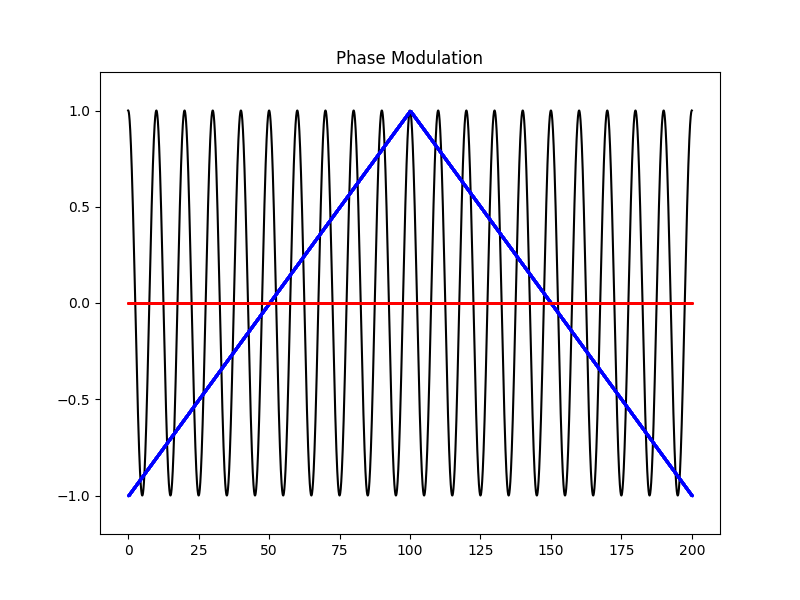

In [21]:
# Triangle wave generation (scipy only seems to have sawtooth)
def triangle_wave(t, amplitude, period):
    m = [-2*(np.abs(-(np.fmod(t[i]*(amplitude)/period, amplitude)-amplitude/2)))+amplitude/2 for i in range(len(t))]
    m = np.array(m)
    return m;

def plot_example_0501(kP):

    theta_PM = wc*t + kP*m
    sP = A * np.cos(theta_PM)

    pm_mod.set_ydata(sP)
    pm_freq.set_ydata(kP/(max_kP)*m_dot*(np.max(sF)/np.max(m_dot)))

    fig.canvas.draw()

# Fixed parameters
A = 1     
max_kP = 16*np.pi

# Convert carrier frequency to radians/sec
wc = 1e5 * 2*np.pi

tri_amplitude = 1
tri_period = 2e-4

max_time = 1*tri_period
t_steps = 20000
t = np.linspace(0,max_time,t_steps)

m = triangle_wave(t, tri_amplitude, tri_period)

# Using gradient may smooth this rather than a first order approximation
m_dot = np.diff(m)/(max_time/t_steps)

sP = A * np.cos(theta_PM)

fig = plt.figure(figsize=(8 ,6))
ax1 = fig.add_subplot(1,1,1)   
pm_mod = ax1.plot(1e6*t, sP, '-k')[0]
ax1.plot(1e6*t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
#ax1.plot(1e6*t[0:len(m_dot)], m_dot*(np.max(sP)/np.max(m_dot)), '.r', markersize=1)
pm_freq = ax1.plot(1e6*t[0:len(m_dot)], kP/(max_kP)*m_dot*(np.max(sP)/np.max(m_dot)), '.r', markersize=1)[0]

ax1.set_ylim((-1.2*np.max(sP), 1.2*np.max(sP)))
ax1.set_title("Phase Modulation");

interact(
    plot_example_0501,
    kP = widgets.FloatSlider(min=0,max=max_kP, step=np.pi/2, value=0),
);

interactive(children=(FloatSlider(value=0.0, description='kP', max=50.26548245743669, step=1.5707963267948966)…

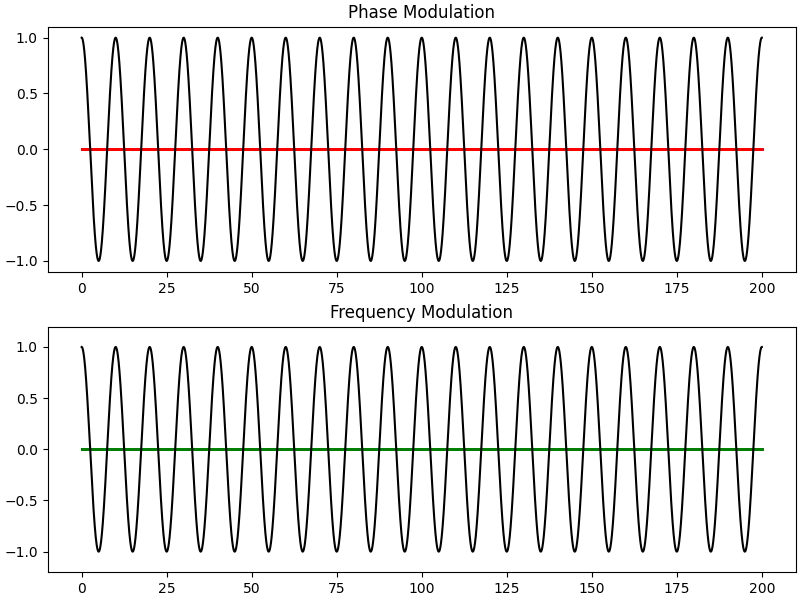

In [52]:


def plot_example_0501b(kP,kF):
    global fig, ax1, ax2, pm_mod, fm_mod
    
    kF=kF*1e-3
    theta_PM = wc*t + kP*m
    theta_FM = wc*t + kF*np.cumsum(m)

    plot_signals = True
    
    if( not plot_signals ):

        # FM Instantaneous Phase
        plt.plot(t, theta_FM, '.k', markersize=12)
        plt.plot(t, temp_wct, '.r', alpha=0.7)
        plt.plot(t, temp_tpf, '.b', alpha=0.7)
        
    else:
        
        A = 1
        sP = A * np.cos(theta_PM)
        sF = A * np.cos(theta_FM)
        
        #PM
        pm_mod.set_ydata(sP)
        pm_phase.set_ydata(kP/(max_kP)*m*(np.max(sF)/np.max(m)))
        pm_freq.set_ydata(kP/(max_kP)*m_dot*(np.max(sF)/np.max(m_dot)))

        #FM
        fm_mod.set_ydata(sF)
        fm_phase.set_ydata(kF*m_sum/np.max(m_sum)/max_kF)
        fm_freq.set_ydata(kF/max_kF*m*(np.max(sF)/np.max(m)))

        fig.canvas.draw()

# Fixed parameters
A = 1       
kP=0
kF=0
max_kP = 16*np.pi
max_kF = 4*np.pi/1e3
# Convert carrier frequency to radians/sec
wc = 1e5 * 2*np.pi
  
tri_amplitude = 1
tri_period = 2e-4


max_time = 1*tri_period
t_steps = 20000
t = np.linspace(0,max_time,t_steps)

m = triangle_wave(t, tri_amplitude, tri_period)

# Using gradient may smooth this rather than a first order approximation
m_dot = np.diff(m)/(max_time/t_steps)
m_sum = np.cumsum(m)


theta_PM = wc*t + kP*m
theta_FM = wc*t + kF*np.cumsum(m)
sP = A * np.cos(theta_PM)
sF = A * np.cos(theta_FM)

# Set up the axes
fig, axs = plt.subplot_mosaic([['PM'],['FM']], figsize=(8,6), constrained_layout=True )
ax1 = axs['PM']
ax2 = axs['FM']

# Draw the initial plots        
ax1.set_title("Phase Modulation")
pm_phase = ax1.plot(1e6*t[0:len(m)], kP/(max_kP)*m*(np.max(sF)/np.max(m)), '.b', markersize=1)[0]
pm_freq = ax1.plot(1e6*t[0:len(m_dot)], kP/(max_kP)*m_dot*(np.max(sP)/np.max(m_dot)), '.r', markersize=1)[0]


pm_mod = ax1.plot(1e6*t, sP, '-k')[0]


ax2.set_title("Frequency Modulation")
fm_freq = ax2.plot(1e6*t[0:len(m)], kF/max_kF*m*(np.max(sF)/np.max(m)), '.b', markersize=1)[0]
#ax2.plot(1e6*t[0:len(m_dot)], m_dot*(np.max(sF)/np.max(m_dot)), '.r', markersize=1)
fm_phase = ax2.plot(1e6*t, kF*m_sum/np.max(m_sum)/max_kF, '.g', markersize=1)[0]

ax2.set_ylim((-1.2*np.max(sF), 1.2*np.max(sF)))
fm_mod = ax2.plot(1e6*t, sF, '-k')[0];
  
interact(
    plot_example_0501b,
    kP = widgets.FloatSlider(min=0,max=max_kP, step=np.pi/2, value=0),
    kF = widgets.FloatSlider(min=0,max=4*np.pi, step=1e-1*np.pi, value=0, description='kF * 1e3')
);

In [36]:
m_sum/np.max(m_sum)*2*np.pi/(4*np.pi)

array([-2.00050015e-04, -4.00060018e-04, -6.00030009e-04, ...,
        2.00000000e-04, -1.00030008e-08, -2.00060018e-04])

interactive(children=(FloatSlider(value=0.0, description='kP rad/V', max=3.141592653589793, step=0.31415926535…

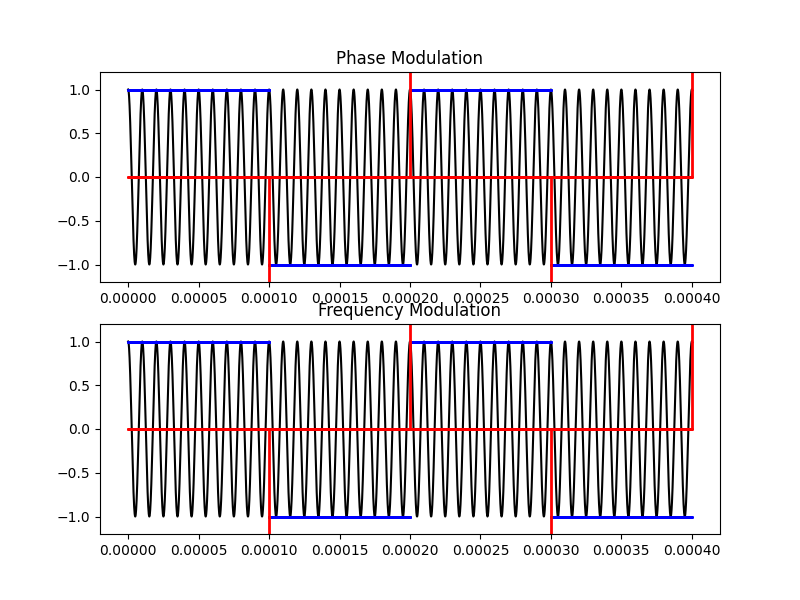

In [41]:
def square_wave(t, amplitude, period):

    m = amplitude*sp.signal.square(t*(2*np.pi/period))
    
    return m

def plot_example_0502(kP, kF):

    theta_PM = wc*t + kP*m
    theta_FM = wc*t + kF*1e-4*np.cumsum(m)

    sP = A * np.cos(theta_PM)
    sF = A * np.cos(theta_FM)

    pm_mod.set_ydata(sP)
    fm_mod.set_ydata(sF)

    fig.canvas.draw()


# Fixed parameters
A = 1
wc = 1e5 * 2*np.pi
sq_amplitude = 1
sq_period = 2e-4

kF=kF*1e-4

max_time = 2*sq_period
t_steps = 20000
t = np.linspace(0,max_time,t_steps)

# Mesg waveform
m = square_wave(t, sq_amplitude, sq_period)
m_dot = np.diff(m)/(max_time/t_steps)

# Initial modulated waveforms
theta_PM = wc*t + kP*m
theta_FM = wc*t + kF*np.cumsum(m)

sP = A * np.cos(theta_PM)
sF = A * np.cos(theta_FM)


# figsize = (width, height)
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

pm_mod = ax1.plot(t, sP, '-k')[0]
ax1.plot(t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
ax1.plot(t[0:len(m_dot)], m_dot*(np.max(sP)/np.max(m_dot)), '.r', markersize=1)
ax1.vlines(t[np.where( m[1:] > m[0:-1])], 0, 2, colors='r',linewidth=2)
ax1.vlines(t[np.where( m[1:] < m[0:-1])], -2, 0, colors='r',linewidth=2)
ax1.set_ylim((-1.2*np.max(sP), 1.2*np.max(sP)))
ax1.set_title("Phase Modulation")

fm_mod = ax2.plot(t, sF, '-k')[0]
ax2.plot(t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
ax2.plot(t[0:len(m_dot)], m_dot*(np.max(sF)/np.max(m_dot)), '.r', markersize=1)
ax2.vlines(t[np.where( m[1:] > m[0:-1])], 0, 2, colors='r',linewidth=2)
ax2.vlines(t[np.where( m[1:] < m[0:-1])], -2, 0, colors='r',linewidth=2)

ax2.set_ylim((-1.2*np.max(sF), 1.2*np.max(sF)))
ax2.set_title("Frequency Modulation")

interact(
    plot_example_0502,
    kP = widgets.FloatSlider(min=0,max=np.pi, step=np.pi/10, value=0, description='kP rad/V'),
    kF = widgets.FloatSlider(min=0,max=8*np.pi, step=0.1*np.pi, value=0, description='kF * 1e4 rad/s/V')
);

In [ ]:
def transformed_sinusoid(t, amplitude, period):

    m = amplitude*np.cos(t*(2*np.pi/period))

    return m

def plot_example_extra(kP, kF):


    theta_PM = wc*t + kP*m
    theta_FM = wc*t + kF*np.cumsum(m)
    
    plot_signals = True
    
    if( not plot_signals ):

        # FM Instantaneous Phase
        plt.plot(t, theta_FM, '.k', markersize=12)
        plt.plot(t, temp_wct, '.r', alpha=0.7)
        plt.plot(t, temp_tpf, '.b', alpha=0.7)
        
    else:
        
        sP = A * np.cos(theta_PM)
        sF = A * np.cos(theta_FM)
        
        pm_mod.set_ydata(sP)
        fm_mod.set_ydata(sF)

        fig.canvas.draw()

# Fixed parameters
A = 1
wc = 1e5 * 2*np.pi    

sq_amplitude = 1
sq_period = 2e-4

max_time = 1*sq_period
t_steps = 20000
t = np.linspace(0,max_time,t_steps)

# Mesg waveform
m = transformed_sinusoid(t, sq_amplitude, sq_period)
m_dot = np.diff(m)/(max_time/t_steps)

# Initial modulated waveforms    
sP = A * np.cos(theta_PM)
sF = A * np.cos(theta_FM)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

pm_mod = ax1.plot(t, sP, '-k')[0]
ax1.plot(t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
ax1.plot(t[0:len(m_dot)], m_dot*(np.max(sP)/np.max(m_dot)), '.r', markersize=1)
ax1.set_ylim((-1.2*np.max(sP), 1.2*np.max(sP)))
ax1.set_title("Phase Modulation")

fm_mod = ax2.plot(t, sF, '-k')[0]
ax2.plot(t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
ax2.plot(t[0:len(m_dot)], m_dot*(np.max(sF)/np.max(m_dot)), '.r', markersize=1)
ax2.set_ylim((-1.2*np.max(sF), 1.2*np.max(sF)))
ax2.set_title("Frequency Modulation")

interact(
    plot_example_extra,
    kP = widgets.FloatSlider(min=0,max=8*np.pi, step=np.pi/3, value=0),
    kF = widgets.FloatSlider(min=0,max=8e-4*np.pi, step=1e-5*np.pi, value=0));